In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Copy of Instagram_Analytics - DO NOT DELETE (for interview purposes) - Instagram Profile Overview.csv')

In [2]:
df.head()

,Date,Profile impressions,Shares,Engagement,Profile visits,Profile reach,Reel shares,New followers,RowHash
0,02/03/2025,83,0,0,0,71,0,0.0,55f2240d75506aea662053ed9adc6bd9cf1c6260073aac...
1,01/03/2025,109,0,0,0,82,0,0.0,09bb917c7fbc3422e044813ba2982c54e551815df00322...
2,28/02/2025,108,0,0,0,59,0,0.0,225a205709a1df025548f1d46a88e97d473b8c10c62588...
3,27/02/2025,82,0,0,0,45,0,19.0,fdc3b58749c9d80ef81a8d980e49b5dae70dbb324031b1...
4,26/02/2025,88,0,0,0,49,0,3.0,97be7df9e0bca9117fc86568d3b6a8cbe46c8824596b7c...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 379 non-null    object 
 1   Profile impressions  379 non-null    int64  
 2   Shares               379 non-null    int64  
 3   Engagement           379 non-null    int64  
 4   Profile visits       379 non-null    int64  
 5   Profile reach        379 non-null    int64  
 6   Reel shares          379 non-null    int64  
 7   New followers        39 non-null     float64
 8   RowHash              373 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 26.8+ KB


In [4]:
df.describe()

,Profile impressions,Shares,Engagement,Profile visits,Profile reach,Reel shares,New followers
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,39.000000
mean,5142.812665,1.176781,162.715040,2.308707,4198.343008,0.411609,4.974359
std,8766.837686,7.112318,1000.646872,8.706697,7761.219440,2.911294,3.738049
min,82.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000
25%,658.000000,0.000000,0.000000,0.000000,500.000000,0.000000,2.000000
50%,1489.000000,0.000000,22.000000,0.000000,1166.000000,0.000000,4.000000
75%,5737.500000,0.000000,114.500000,0.000000,3541.000000,0.000000,6.000000
max,50499.000000,97.000000,15075.000000,98.000000,46180.000000,54.000000,19.000000


In [5]:
# Checking for duplicates
df.duplicated().sum()

0

In [6]:
# Checking the percentage of null values for each column
df.isnull().sum()/ len(df) * 100

Date                    0.000000
Profile impressions     0.000000
Shares                  0.000000
Engagement              0.000000
Profile visits          0.000000
Profile reach           0.000000
Reel shares             0.000000
New followers          89.709763
RowHash                 1.583113
dtype: float64

In [7]:
# Decided to drop the row with the null value with a RowHash because it is a unique identifier and should not be null.
df = df.dropna(subset=['RowHash'])

In [8]:
# from my domain knowledge, seeing the null values in the 'New followers' column, I can assume that the null values mean that there were no new followers for that day.
df['New followers'] = df['New followers'].fillna(0)

### Tackling any inconsistencies in the dataset.

In [9]:
df['Date'].dtypes
# The 'Date' column has been read as an object, so I will convert it to datetime format.
# The output below shows that pandas assigned the object dtype to your Date column.

dtype('O')

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'].dtypes
# Now the 'Date' column is in datetime format, which is more suitable for time series analysis.

dtype('<M8[ns]')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 373 non-null    datetime64[ns]
 1   Profile impressions  373 non-null    int64         
 2   Shares               373 non-null    int64         
 3   Engagement           373 non-null    int64         
 4   Profile visits       373 non-null    int64         
 5   Profile reach        373 non-null    int64         
 6   Reel shares          373 non-null    int64         
 7   New followers        373 non-null    float64       
 8   RowHash              373 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 29.1+ KB


##### From the info above, you can see that I have successfully tackled the issue of any missing or inconsistent data, therefore the dataset is now clean and ready for analysis.

## 2. Basic Analysis


In [12]:
#  Calculating the average engagement rate for Instagram posts.
average_engagement_rate = df['Engagement'].mean()
print(f"Average Engagement Rate: {average_engagement_rate:.2f}")

Average Engagement Rate: 161.34


In [13]:
# Identifing the top-performing post based on engagement (likes, comments, shares).
metrics = ['Profile impressions', 'Profile reach', 'New followers', 'Engagement', 'Shares', 'Reel shares', 'Profile visits']
for metric in metrics:
    print(f"Top performing post based on {metric}:")
    print(df.loc[df[metric].idxmax()])
    print("\n")

Top performing post based on Profile impressions:
Date                                                 2024-09-07 00:00:00
Profile impressions                                                50499
Shares                                                                 0
Engagement                                                           102
Profile visits                                                         0
Profile reach                                                      46180
Reel shares                                                            0
New followers                                                        0.0
RowHash                a9abdc3fd531f562d7f6698ea653e6fb1fe72644c28bfe...
Name: 176, dtype: object


Top performing post based on Profile reach:
Date                                                 2024-09-07 00:00:00
Profile impressions                                                50499
Shares                                                                 0
Eng

## 3. Visualization

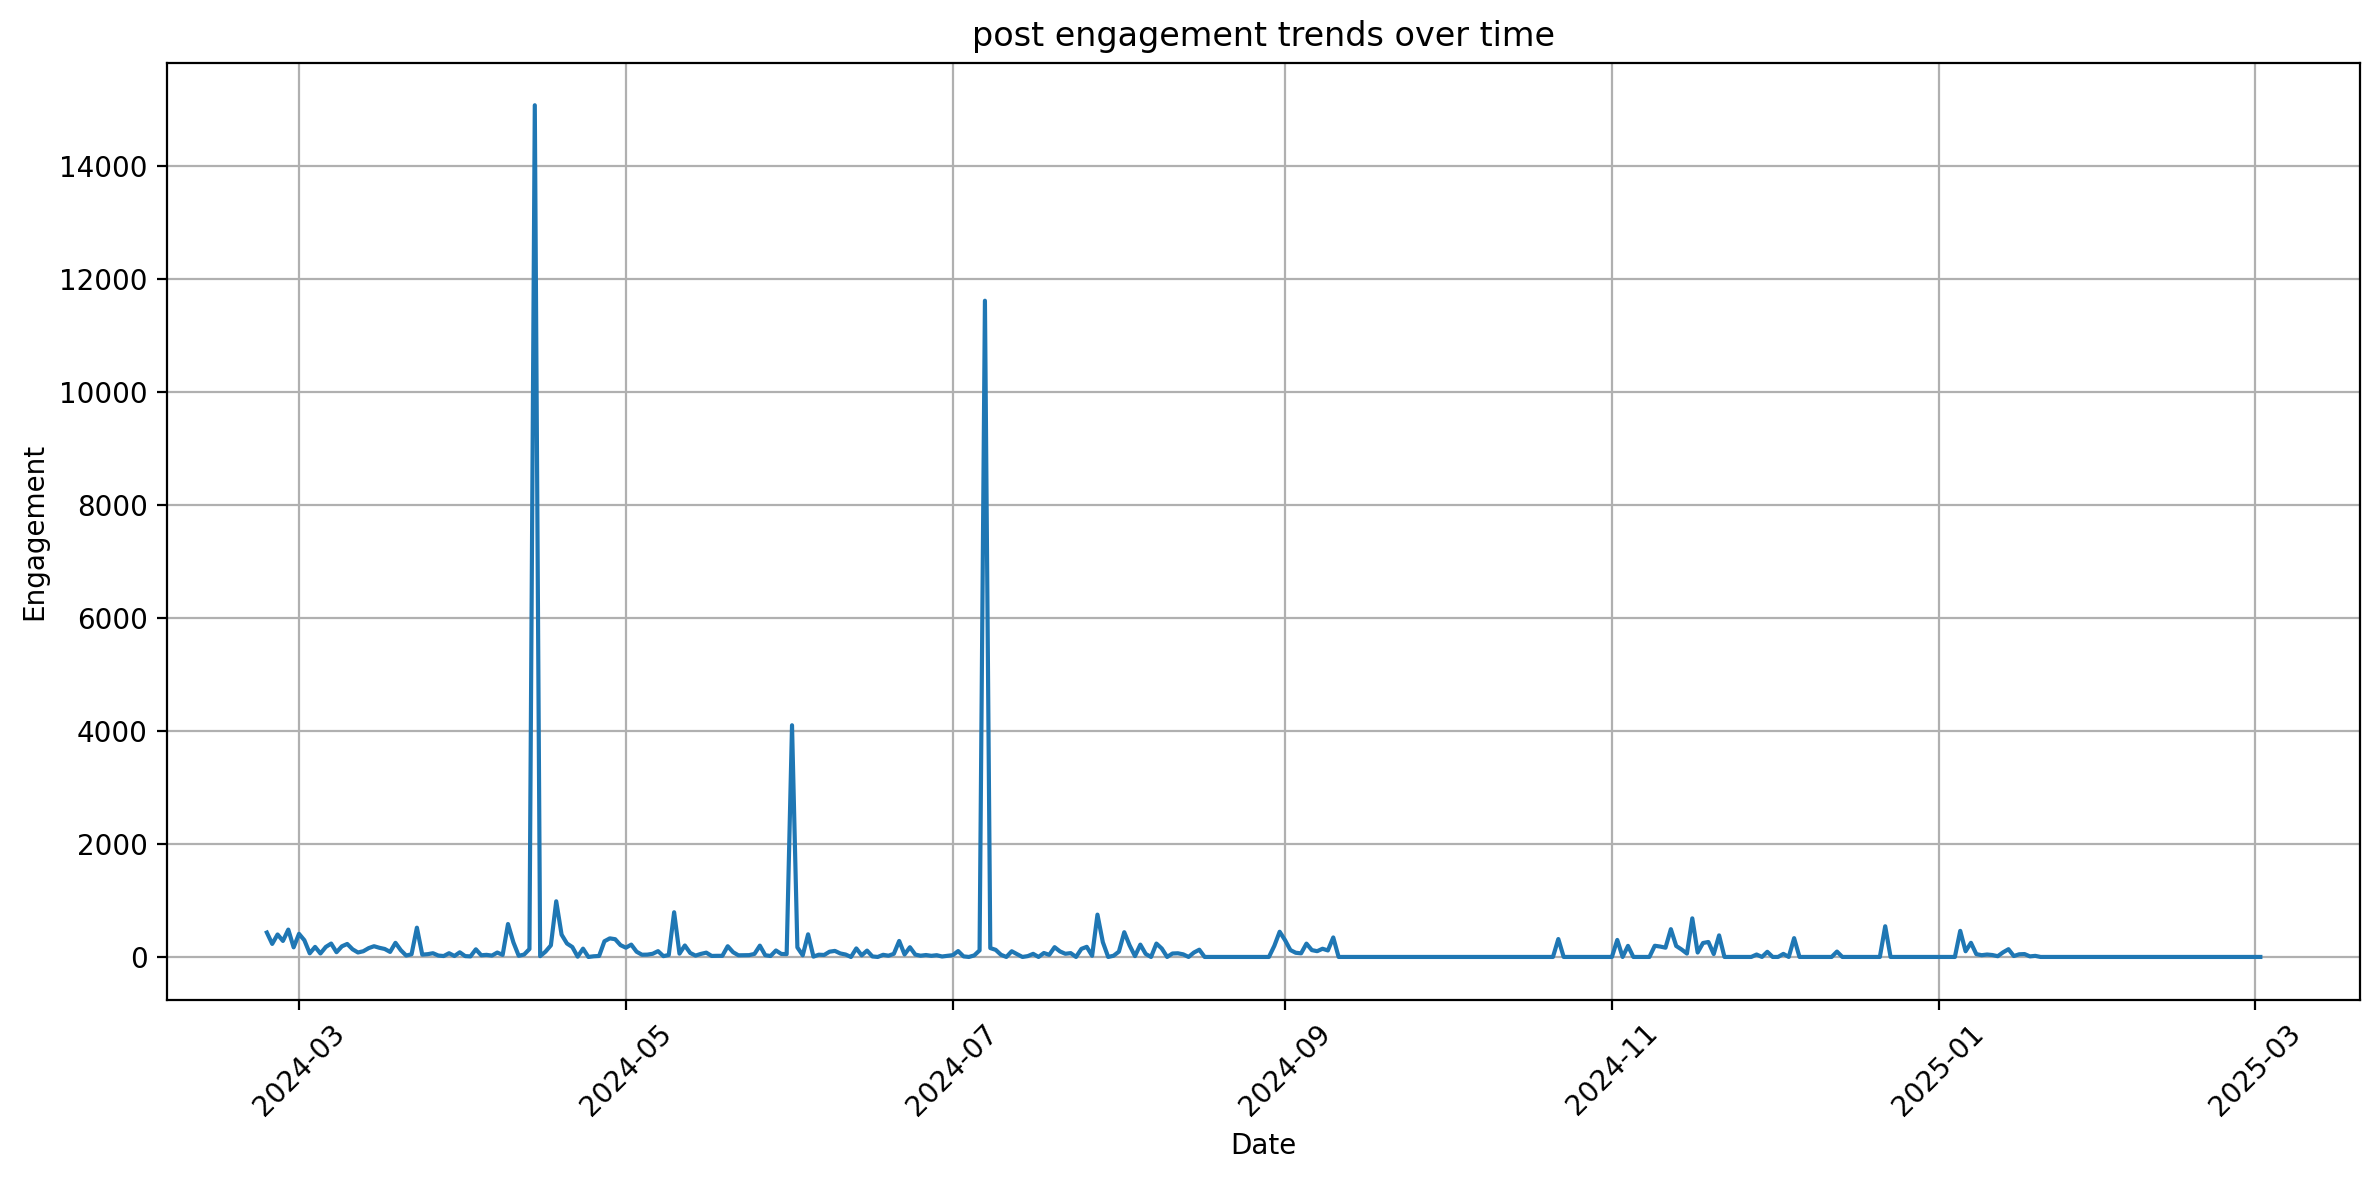

In [14]:
# A simple line chart showing post engagement trends over time.

plt.figure(figsize=(12, 6), dpi=200)
plt.plot(df['Date'], df['Engagement'] )
plt.title('post engagement trends over time')
plt.xlabel('Date')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

##### Notice that in the chart above, there was a spike in engagement between 2023-04 and 2023-05, which could indicate a successful campaign or a particularly engaging post during that period.

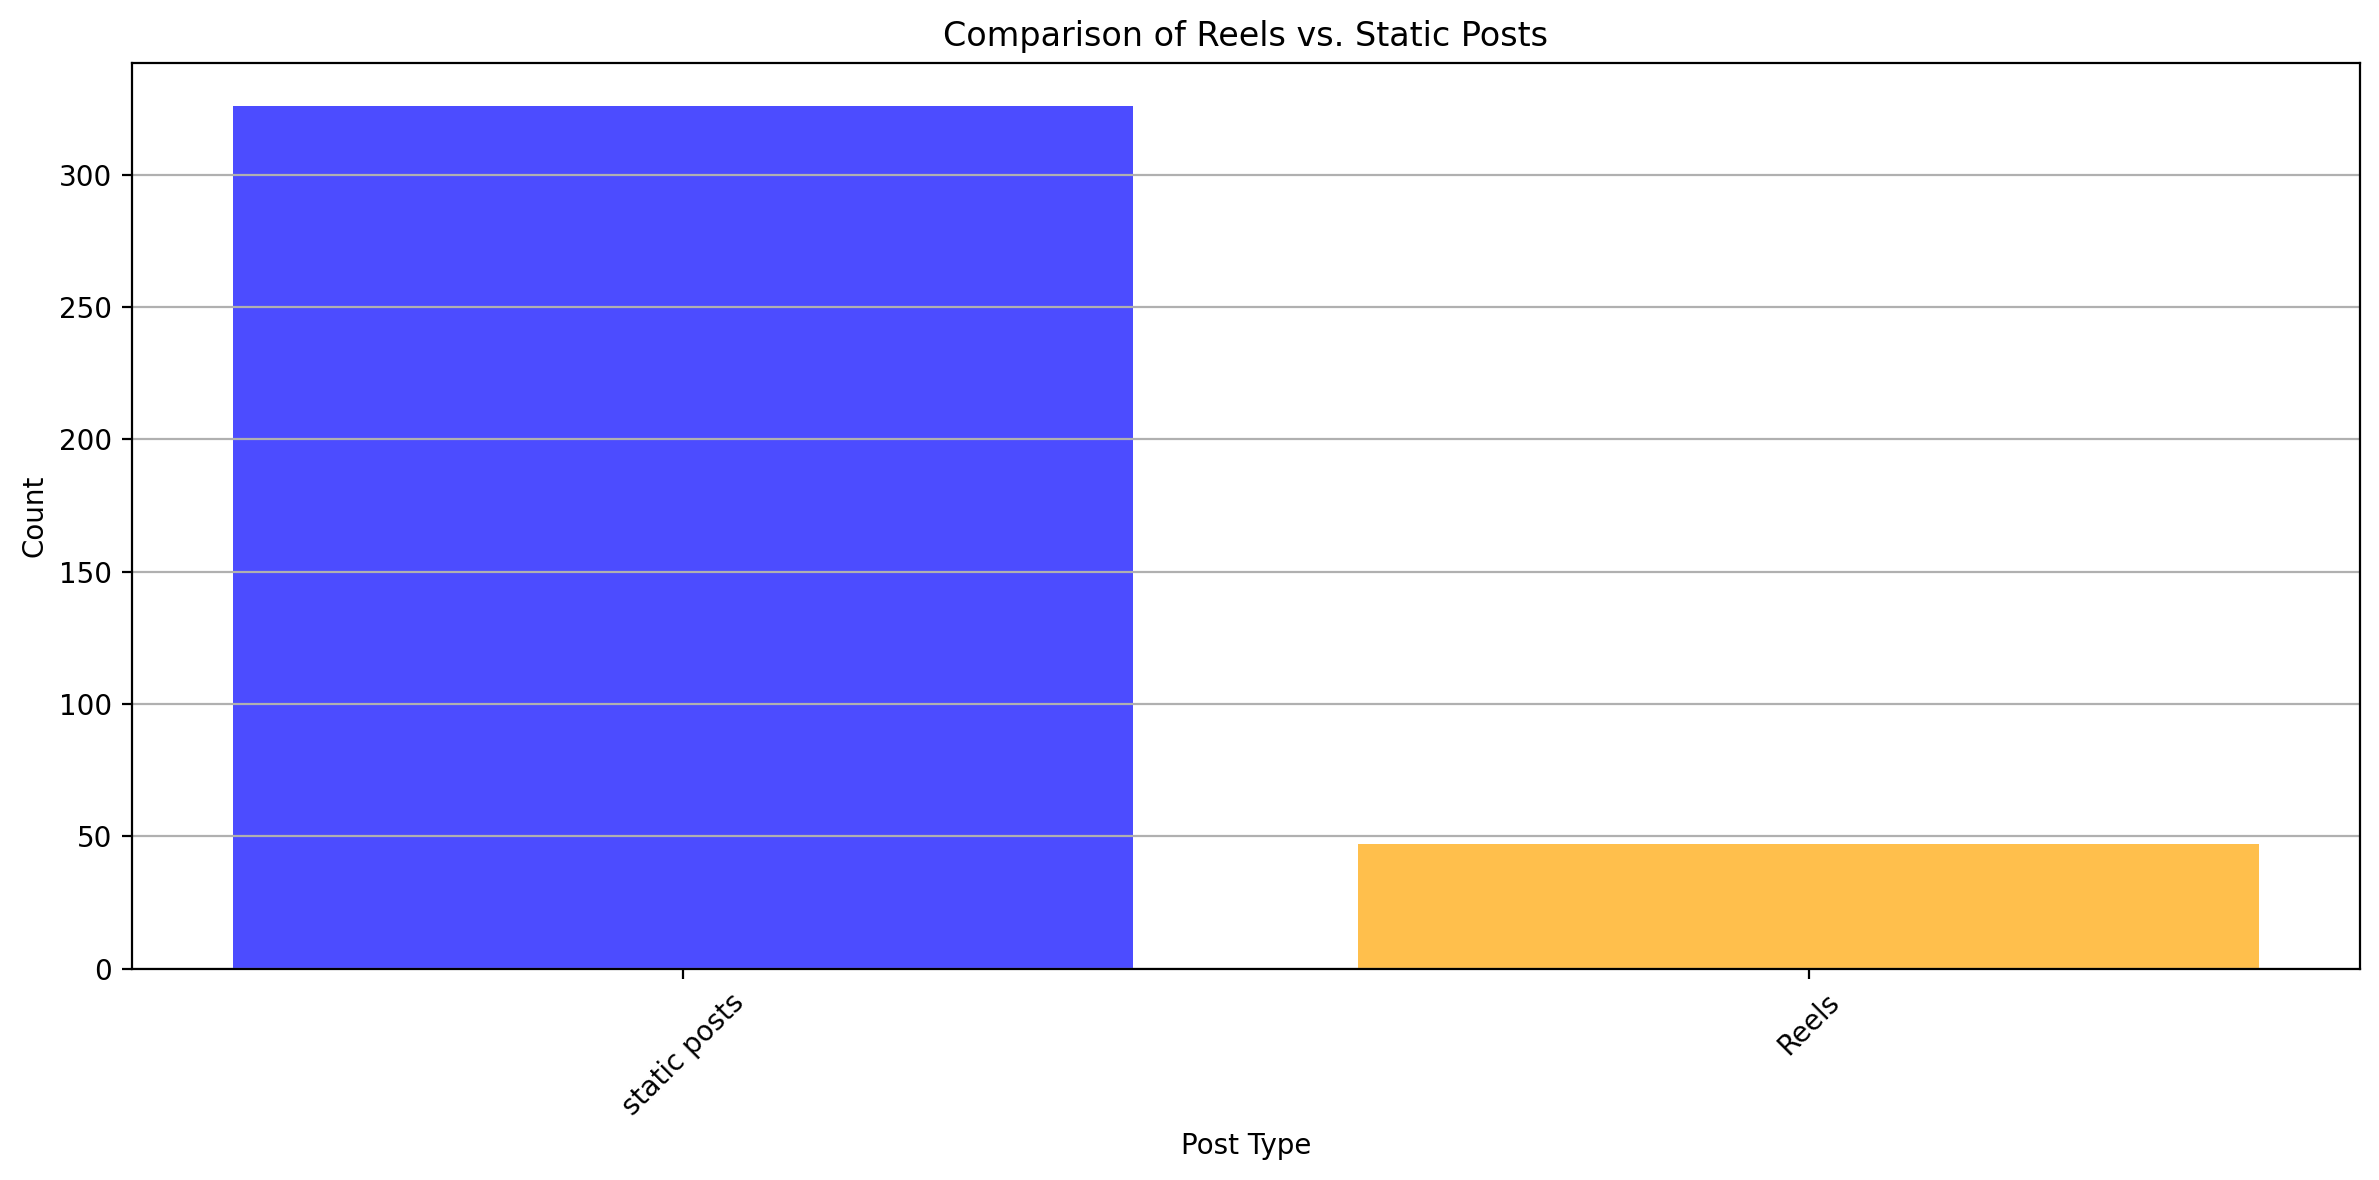

In [15]:
# Plot a bar chart comparing different post types (Reels vs. Static Posts). 
df['post type'] = np.where(df['Reel shares'] > 0, 'Reels', 'static posts')
plt.figure(figsize=(12, 6), dpi=200)
post_type_counts = df['post type'].value_counts()
plt.bar(post_type_counts.index, post_type_counts.values, color=['blue', 'orange'], alpha=0.7)
plt.title('Comparison of Reels vs. Static Posts')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### From the bar chart, we can see that there are more static posts than Reels.

## 4. Bonus Task (Optional)

##### • Write a function that predicts whether a post will perform well based on previous engagement data (e.g., using a simple threshold model).

In [16]:
#  Write a function that predicts whether a post will perform well based on previous engagement data (e.g., using a simple threshold model).
df[(df['Engagement'] < 10) & (df['Engagement'] != 0)]

# From the above output, I can see that posts with an engagement of less than 10 are not performing well, so 10 is a good threshold to use.

,Date,Profile impressions,Shares,Engagement,Profile visits,Profile reach,Reel shares,New followers,RowHash,post type
246,2024-06-29,1253,0,8,0,1019,0,0.0,9849e7ddca428fea6cca50be0b4ab0cbdadbcf711a6726...,static posts
259,2024-06-16,1603,0,9,0,1273,0,0.0,21e8d8c796d86d11d80432f8ab0977aaff4477c692adc2...,static posts
270,2024-06-05,1367,0,6,2,1093,0,0.0,d4e94380825fbad51929d3a9c238f1437ce73f2912339f...,static posts
314,2024-04-22,11343,0,5,0,9890,0,0.0,18de872db456249f71b9fc80378bf1b69b41efd952bd5e...,static posts


In [17]:
threshold = 10
def predict_post_performance(engagement):
    if engagement >= threshold:
        return "likely to perform well"
    else:
        return "unlikey to perform well"

# With this function, I can predict the performance of a post based on its engagement value. If the engagement is greater than or equal to the threshold, it is likely to perform well; otherwise, it is unlikely to perform well.
predict_post_performance(np.random.randint(0, 100)) # Example usage with a random engagement value

# Applying the function to the DataFrame to create a new column 'Performance Prediction'
# df['performance_prediction'] = df['Engagement'].apply(predict_post_performance)

'likely to perform well'

##### I will now save the cleaned DataFrame to a new CSV file.

In [18]:
# Saving the cleaned DataFrame to a new CSV file
df.to_csv('Instagram_Analytics_Cleaned.csv', index=False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 373 non-null    datetime64[ns]
 1   Profile impressions  373 non-null    int64         
 2   Shares               373 non-null    int64         
 3   Engagement           373 non-null    int64         
 4   Profile visits       373 non-null    int64         
 5   Profile reach        373 non-null    int64         
 6   Reel shares          373 non-null    int64         
 7   New followers        373 non-null    float64       
 8   RowHash              373 non-null    object        
 9   post type            373 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 40.2+ KB
